# Defining a Statistical Model

In the most general sense, the goal of statistics is understand the world around us.  Often times, to do this, we come up with a mental model of the world, from data.  If our data is of a high quality and is an accurate reflection of the world around us, the model we come up with can possibly be an accurate reflection of the world, rather than meaningless symbols or "just notation".  

With a well informed model, we can simulate the underlying phenomenon we captured data on, either extrapolating into the future what might happen in the real world, understanding what's happening now, even if we can't directly observe it, or being able to automate away an extremely hard task.  

Statistical models allow us to ask - 

* What if?
* What's happening now?
* Why is it happening?
* What will happen?
* What happened?

And actually come up with answers that might be reasonable!  

Additionally, statistical models allow us to automate tasks that appear like science fiction; we can teach robots to simulate processes of cognition like sight, hearing, and speech.  

In order to understand how these models work, we'll need quite a bit of mathematical rigour, but the pay off will be the ability to simulate and understand the world around us through computation.

# Maximum Likelihood Estimation

Before we start introducing statistical models, we need the right mental model of what a statistical model is and does.  For this we turn to maximum likelihood estimation.  You may recall from last time that maximum likelihood estimation can be used to find the shape parameters of a distribution.  Recall that the shape parameters are merely the associated measures of center, spread, skew, kurtosis and higher order terms that allow us to easily define an accurate description of the underlying data through a process that generates data similar to the distribution of values seen.

Realize, that given the above description, we've already seen our first statistical model - the process (or mathematical formula) that generates a distribution of data via sampling.

Let's review with a few examples to see this in action:

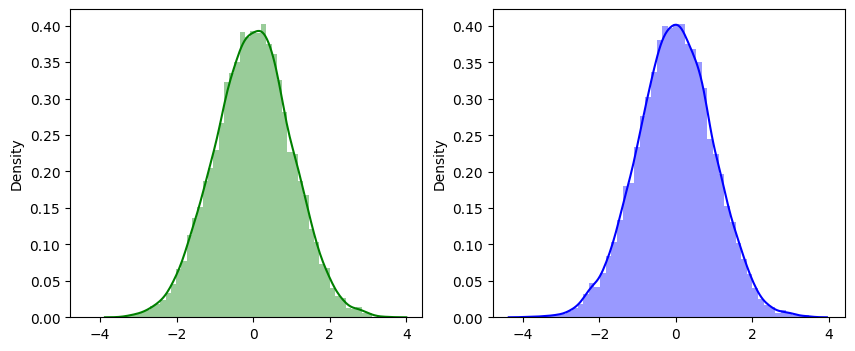

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

data = np.random.normal(0, 1, size=10000)
center, spread = stats.norm.fit(data)
simulated_data = np.random.normal(center, spread, size=10000)

f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.distplot( data , color="green", ax=axes[0])
sns.distplot( simulated_data , color="blue", ax=axes[1])
plt.show()

As you can see here there is very little difference between the simulated data and or original source!  This is because we made a few assumptions:

1. we assumed a normal distribution when simulating our data
2. we assumed we had enough original data to come up with reasonable shape parameters

In general, this leads us to a conclusion - we can think of the underlying distribution that our most closely resembles as sort of a mental model for our real world phenomenon.  By understanding the underlying distribution that creates our process, in this case a normal distribution, we can simulate accurate representations of our underlying process, by only knowing the center and spread of the data!

## Exercise

Use the following function to test the given data set, and then simulate new data.  Check your conclusion by plotting the two datasets, your simulated one and the original, as well as looking at the answer.  Do this for 10 separate runs.

In [4]:
import random
import numpy as np

def get_random_dataset():
    dists = ["normal", "exponential", "gamma", "poisson"]
    method = random.choice(dists)
    
    if method == "exponential":
        scale = random.randint(0, 500)
        return method, np.random.exponential(
            scale=scale, 
            size=500
        )
    if method == "gamma":
        scale = random.randint(0, 500)
        shape = random.randint(0, 5)
        return method, np.random.gamma(
            shape=shape,
            scale=scale, 
            size=500
        )
    if method == "normal":
        scale = random.randint(0, 15)
        loc = random.randint(0, 500)
        return method, np.random.normal(
            loc=loc,
            scale=scale,
            size=500
        )
    if method == "poisson":
        lam = random.randint(1, 6)
        return method, np.random.poisson(
            lam=lam,
            size=500
        )
    
answer, data = get_random_dataset()

## The Connection Between Likelihood and Probability

Before we leave our high level discussion, there is an important point to make - 

$$ Likelihood(data | \mu, \sigma) \neq Probability(\mu, \sigma | data) $$

This is because with the likelihood we ask, what are the most likely shape parameters that could have generated this data?  With the probability we ask, given these shape parameters what is the probability we saw this data?

So we can think of these as two sides of the same coin for estimation purposes.

Let's see what the probability would look like in python:

Source: https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1

In [8]:
def probability(mu, sigma, data):
    simulated_data = np.random.normal(mu, sigma, size=len(data))
    return stats.ttest_ind(simulated_data, data)[1]

data = np.random.normal(0, 1, size=10000)
mu_guess = 0
sigma_guess = 1
probability(mu_guess, sigma_guess, data)
# probability that given these shape parameters we saw this data

0.88026944877706

## Exercise

Use the student's t-test to calculate the probability that you were able to recover the shape parameters for a given distribution.  Do this 10 times with the following function.  You can check the true answer.  Be sure to figure out which distribution you are working with first, then figure out the shape parameters using maximum likelihood estimation, then calculate the t-test to get the probability.  After that simulate out the data, like in the previous exercise, and compare your simulated data with the original, does the simulated data look similar with the original?  Run a ks-2sample test to make sure.  

In [5]:
import random
import numpy as np

def get_random_dataset():
    dists = ["normal", "exponential", "gamma", "poisson"]
    method = random.choice(dists)
    
    if method == "exponential":
        scale = random.randint(0, 500)
        return method, np.random.exponential(
            scale=scale, 
            size=500
        ), [scale]
    
    if method == "gamma":
        scale = random.randint(0, 500)
        shape = random.randint(0, 5)
        return method, np.random.gamma(
            shape=shape,
            scale=scale, 
            size=500
        ), [shape, scale]
    
    if method == "normal":
        scale = random.randint(0, 15)
        loc = random.randint(0, 500)
        return method, np.random.normal(
            loc=loc,
            scale=scale,
            size=500
        ), [loc, scale]
    
    if method == "poisson":
        lam = random.randint(1, 6)
        return method, np.random.poisson(
            lam=lam,
            size=500
        ), [lam]
    
answer, data, shape_parameters = get_random_dataset()

## Linear Regression 

Linear Regression is one of the simplest and most interpretable models there is.  Before we dive into it's specifics, let's first see how it relates to maximum likelihood estimation:

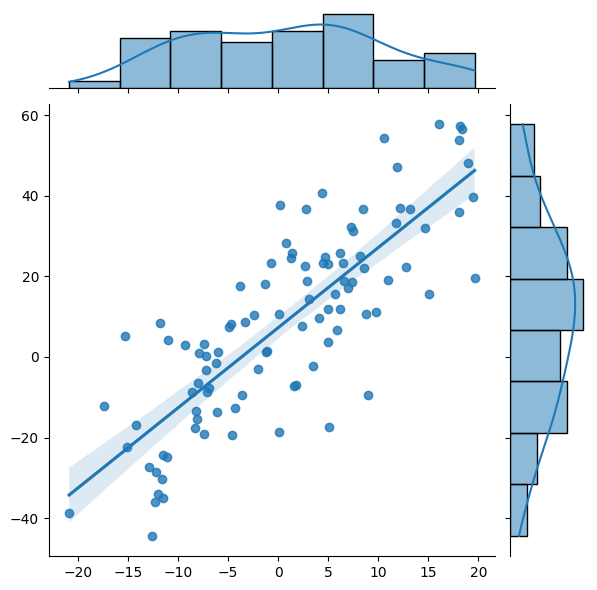

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

x = np.random.normal(0, 10, size = 100)
y = x*2 + 5 + np.random.normal(0, 15, size = 100)
sns.jointplot(x=x, y=y, kind="reg")
plt.show()

Here we see the joint distribution of the data.  By looking at the blue shaded line we see the joint simulated distribution from the relationship between the shape parameters of the shared distribution.  Additionally, we see the point estimate - the maximum likelihood estimation - the dark blue line cutting through the data.

The reason why a distribution like this:

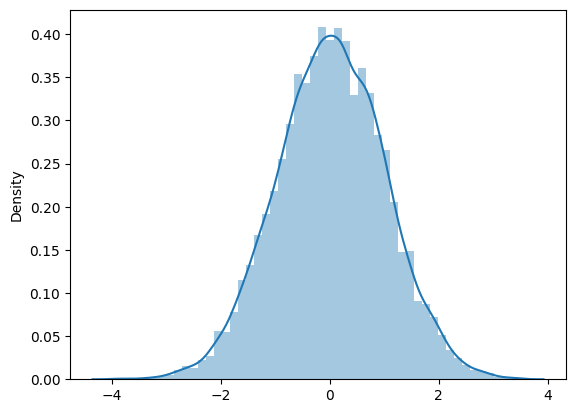

In [17]:
import warnings
warnings.filterwarnings("ignore")

data = np.random.normal(0, 1, size=10000)
sns.distplot(data)
plt.show()

is simple - it's because the maximum point estimate for this distribution is where the majority of the top of the theoretical curve that represents the shape of the distribution.  In other words, the MLE takes the highest point of the distribution.  In two dimensional space, this is represented as a line as the above picture shows.

"One might even say as maximum likelihood estimation of a vector x, given linear measurements corrupted by Gaussian measurement errors."

stolen from http://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf this line is beautiful and I need think of my own way of saying it.

## The Ordinary Least Squares Algorithm

The Ordinary Least Squares Algorithm is probably the simplest thing you could think of - Here is the psuedo code for the algorithm:

1. start with a line cutting through the data (perhaps pick two random points in the space and draw a line through them)
2. look at the difference between all the points and the line
3. update the line such that the sum of the squared differences is made smaller
4. repeat until the sum of squared differences is as small as possible

There are lots of ways to implement this, we'll look at a few methods here:

### A Brief Digression - Newton - Raphson's Method

Before we go through Stochastic Gradient Descent, let's start by looking at a simplier method for approximating values.

Newton-Raphson's Method is based on the notion that we can guess and check our way to the solution of a minimization or maximization problem through iteration.  

This method can be used to approximate the roots of any real valued function.

The way the method works is as follows:

1. Initialize a guess root $x_{0}$
2. Calculate the derivative with respect to the function
3. Update our guess by $x_{i} = x_{i-1} - \frac{f(x_{i-1})}{f'(x_{i-1})}$
4. Once the change between $x_{i}$ and $x_{i-1}$ is neglible then we quit

In [18]:
from IPython.display import HTML
HTML('<img src="NewtonIteration_Ani.gif">')

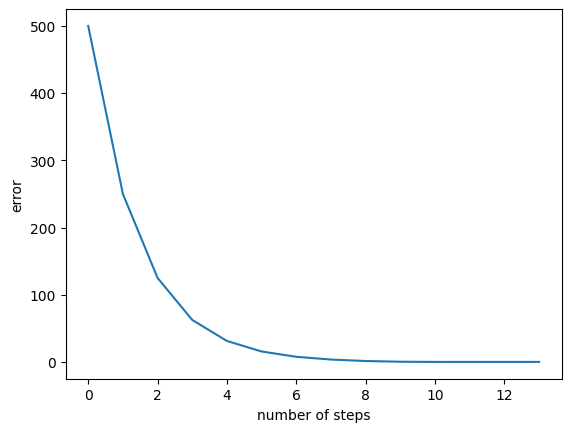

In [20]:
from hackthederivative import complex_step_finite_diff as differentiate
from functools import partial
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

def newton_raphson_method(x_0, f, tolerance=1e-10, max_iter=1e5):
    fprime = partial(differentiate, f)
    x_cur = 100000000000
    x_prev = x_0
    count = 0
    error = []
    while True:
        x_cur = x_prev - (f(x_prev) / fprime(x_prev))
        error.append(abs(x_prev - x_cur))
        if abs(x_prev - x_cur) < tolerance:
            break
        x_prev = x_cur
        count += 1
        if count > max_iter:
            break
    return x_cur, error
    
root, error = newton_raphson_method(1000, lambda x: x**2 - 9)
plt.plot(error)
pylab.xlabel('number of steps')
pylab.ylabel("error")
plt.show()

While the method we will use for ordinary least squares is somewhat different in how it's computed, two conceptual themes will remain consistent - we can use a derivative to drive our model closer to an optimum.  And second, as our model updates, we will (hopefully) reduce the amount of error in our guess.

## Gradient Descent

Gradient Descent, like Newton-Raphson can be used to guess values that optimize some problem.  The general problem Gradient Descent solves is that of maximum likelihood estimation.  

There are two main ways the algorithm can be implemented:

1. Via Linear Algebra
2. Via Calculus 

Of the two methods above typically the Linear Algebra solution is used in practice, but is far harder to understand than it's Calculus equivalent.  Let's look at the Calculus version below:

Gradient Descent requires a cost function.  The cost function used will give us the gradients that we will use to do our updating of our model parameters.  Generally speaking, a cost function is answering the question of how far apart our model prediction is from what was actually seen in the data?  This means, cost functions are typically described in terms of total distance from our predictions to the observed values from the data.  Thus in general our Gradient Descent algorithm looks like this:

1. Initialize our model parameters with random values
2. Calculate the gradient by summing the partial derivatives of the cost function for each parameter
3. Update each parameter by subtracting off the partial derivative with respect to that parameter 
4. Continue until error is minimized with respect to all parameters

Notice the similarities between this method and Newton-Raphson, these are the steps of the two algorithms in general:

1. initialize with some random guess
2. calculate a derivative
3. update based on that derivative
4. continue until the error becomes neglible

Now let's look at how to implement gradient descent for ordinary least squares:


Reference:

[ML Cheatsheet](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

In [21]:
import math
import random

def update_weights(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    for i in range(N):
        # Calculate partial derivatives w.r.t to equation (y - (mx + b))^2
        # remember we use the chain rule here.
        # -2x(y - (mx + b))
        m_deriv += -2*X[i] * (Y[i] - (m*X[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(Y[i] - (m*X[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / N) * learning_rate
    b -= (b_deriv / N) * learning_rate
    
    return m, b

def cost_function(m, b, X, y):
    N = len(X)
    total_cost = 0
    for i in range(N):
        total_cost += math.pow((y[i] - (m*X[i] + b)), 2)
    return total_cost / N

def gradient_descent(X, y, learning_rate=0.001, tolerance=1e-2, max_iter=1e5):
    m = 0
    b = 0
    error = []
    count = 0
    while True:
        m, b = update_weights(m, b, X, y, learning_rate)
        cur_cost = cost_function(m, b, X, y)
        error.append(cur_cost)
        count += 1
        if cur_cost < tolerance:
            break
        if count > max_iter:
            break
    return m, b, error
    
X = [random.randint(1, 10)+random.random()*10 for _ in range(1000)]
y = [4 + 3*X[i] + random.random() for i in range(len(X))]
m, b, error = gradient_descent(X, y)
y_predict = [m*X[i]+b for i in range(len(X))]

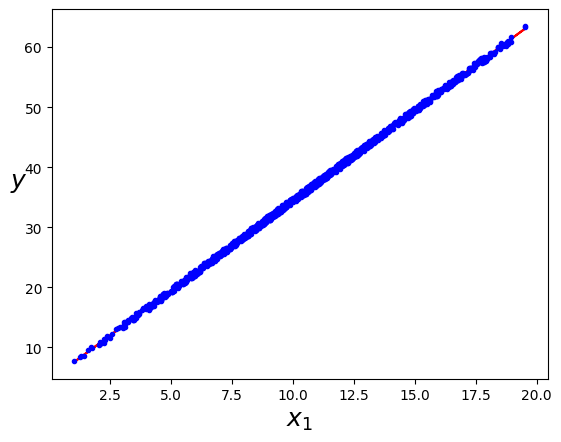

In [22]:
plt.plot(X,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.show()

As we can see, our algorithm does quiet well!

## Working With Libraries


Now let's look at an example using a library (which you'll usually do) to do linear regression:

In [ ]:
import statsmodels.api as sm
# fix this - use the vanderbilt data
crashes = sns.load_dataset("car_crashes")
speeding = sm.add_constant(crashes["speeding"])
ols = sm.OLS(crashes["total"].values, speeding)
result = ols.fit()
result.summary()

## T-Tests and F-Tests

Let's start by understanding what the "t-test" and the "f-test" mean in this context.  If you recall from last time, in general the t-test is used to test whether or not two different samples come from the same distribution.  In this case the "t-test" tests the null hypothesis that the given independent variable is different from zero.  So if we reject the null hypothesis, in this case, it is different than zero.

Likewise for the "F-test", in general it tests if 2 or more variables come from the same population.  In this case, the null hypothesis states that all the variables jointly equal zero or in otherwords, contribute nothing to the explaination of the y variable.

# FIX ME - use vanderbilt data
To be specific, in the above example with respect to the t-tests:

We reject the null hypothesis both times, therefore speeding and the constant term both are different than zero.  This means there is some bias term that is constant and speeding both contribute statistically to the explaination of total car crashes per billion miles.

We also reject the null hypothesis that the variables jointly are zero and therefore the model does have statistical meaning.

Source: https://stats.stackexchange.com/questions/59250/how-to-interpret-the-output-of-the-summary-method-for-an-lm-object-in-r

## Goodness of fit measures

The next two measures we will look at are Akaike Information Criterion and Bayesian Information Criterion, but first we will look at the algorithm that underlies them both: KL - Divergence

### Digression - KL-Divergence

Kullback Liebler divergence is, like many other things in statistics a way of measuring how different two distributions are.  But the way it asks the question and the uses of KL-Divergence are surprisingly rich.  Checkout this quote from wikipedia:

"Expressed in the language of Bayesian inference, ${\displaystyle D_{\text{KL}}(P\parallel Q)}$  is a measure of the information gained when one revises one's beliefs from the prior probability distribution Q to the posterior probability distribution P.  In other words, it is the amount of information lost when Q is used to approximate P.  In applications, P typically represents the "true" distribution of data, observations, or a precisely calculated theoretical distribution, while Q typically represents a theory, model, description, or approximation of P.  In order to find a distribution Q that is closest to P, we can minimize KL divergence and compute an information projection."

Source: https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence

While this feels like a restatement of ks_2sample with fewer guarantees:

1. it's assymetric => ${\displaystyle D_{\text{KL}}(P\parallel Q)} \neq {\displaystyle D_{\text{KL}}(Q\parallel P)}$

2. there is no guarantee that comparisons between different paired distributions will have an ordering:

I.E. if we have: 

${\displaystyle D_{\text{KL}}(P\parallel Q)} = 5$

${\displaystyle D_{\text{KL}}(Q\parallel R)} = 7$

It is not the case that:

${\displaystyle D_{\text{KL}}(P\parallel Q)} \lt {\displaystyle D_{\text{KL}}(Q\parallel R)}$

And further more:

${\displaystyle D_{\text{KL}}(P\parallel R)} \neq 12$

And yet!

KL-Divergence is **_powerful_**.  To summarize, once of the ways we can use it:

* compare the divergence between two distributions _regardless_ of distribution shape.

Consider the following case:

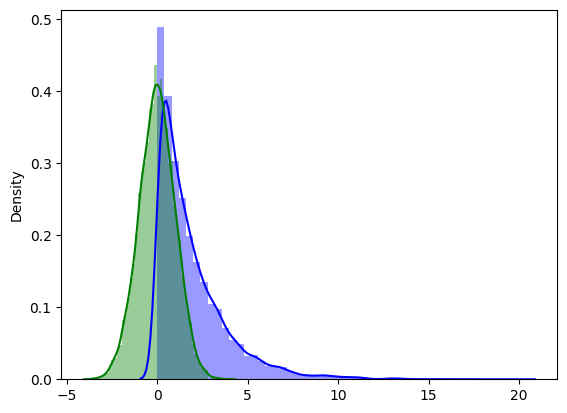

In [23]:
normal_dist = np.random.normal(0, 1, size=10000)
exponential_dist = np.random.exponential(1.9, size=10000)
sns.distplot( exponential_dist , color="blue")
sns.distplot( normal_dist , color="green")

plt.show()

We can use KL-Divergence to measure how different these really are!!!

In [27]:
from scipy import stats
import numpy as np
t1 = stats.norm(0, 1)
t2 = stats.expon(1.9)

# domain to evaluate PDF on
x = np.linspace(-5, 5, 100)
stats.entropy(t1.pdf(x), t2.pdf(x))

inf

Perhaps surprisingly, the divergence is infinite!  Despite these two distributions appearing very similar, they are definitely different!  This gives us more reason to believe that we shouldn't always trust, even precise pictures.

Another important use of KL-Divergence is telling you by how much you are off from a theoretical optimum.  In other words, if we have enough information, it tells us how much we don't know.  

The interested, there are even more examples found here: 
    
https://www.programcreek.com/python/example/62037/scipy.stats.entropy
        
## Akaike Information Criterion && Bayesian Information Criterion

The AIC is another one of those tools that helps assess how well the model does.  It is an application of KL-divergence.  The way it does this is by looking at the overall goodness of fit of the model.  The smaller the AIC, the better the model fits the data.  And if a model has lots of parameters the score will always be higher, so this is a way of assessing goodness of fit, while avoiding overfitting.